In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import struct
import numpy as np
import math

# Defining and training the CNN

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(28, 28, 1), use_bias=False))
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(26, 26, 1), use_bias=False))
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(24, 24, 1), use_bias=False))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax', use_bias=False))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=6,
                    validation_data=(test_images, test_labels))

Epoch 1/6
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5369 - accuracy: 0.8430 - val_loss: 0.3214 - val_accuracy: 0.9079
Epoch 2/6
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3156 - accuracy: 0.9103 - val_loss: 0.2873 - val_accuracy: 0.9206
Epoch 3/6
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2971 - accuracy: 0.9169 - val_loss: 0.2750 - val_accuracy: 0.9253
Epoch 4/6
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2841 - accuracy: 0.9200 - val_loss: 0.2721 - val_accuracy: 0.9229
Epoch 5/6
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2757 - accuracy: 0.9233 - val_loss: 0.2641 - val_accuracy: 0.9269
Epoch 6/6
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2673 - accuracy: 0.9246 - val_loss: 0.2585 - val_accuracy: 0.9295


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.2585 - accuracy: 0.9295
Test accuracy: 0.9294999837875366


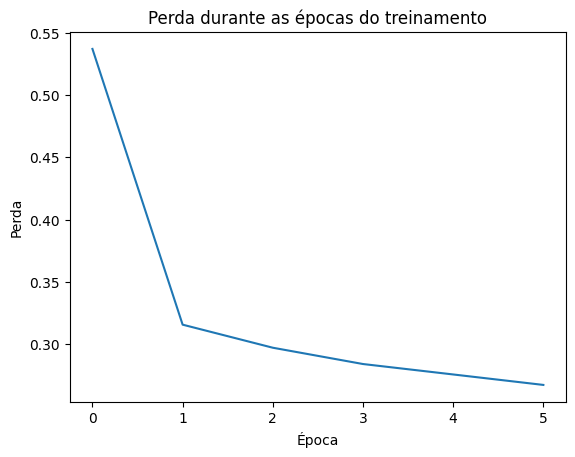

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda durante as épocas do treinamento')
plt.show()

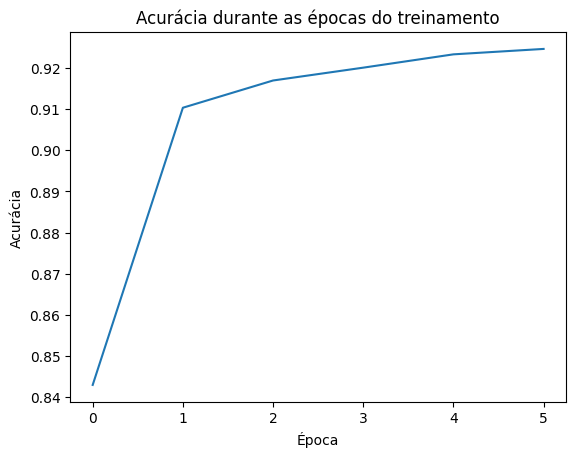

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Acurácia durante as épocas do treinamento')
plt.show()

In [ ]:
model.save_weights('model.h5')
# model = models.load_model('model.h5')

# Saving the weights and images in customized format

In [ ]:
first_convolution = model.layers[0].get_weights()[0]
second_convolution = model.layers[1].get_weights()[0]
third_convolution = model.layers[2].get_weights()[0]
fully_connected = model.layers[4].get_weights()[0]

f1 = open("first_convolution.txt", "w")
first_kernel_size = len(first_convolution)
f1.write(f'#define KERNEL_SIZE_1 {first_kernel_size}\n')
f1.write(f'float first_convolution[KERNEL_SIZE_1][KERNEL_SIZE_1];\n')
for i in range(first_kernel_size):
  for j in range(first_kernel_size):
      f1.write(f'first_convolution[{i}][{j}]={first_convolution[i][j][0][0]};\n')
f1.close()

f2 = open("second_convolution.txt", "w")
second_kernel_size = len(second_convolution)
f2.write(f'#define KERNEL_SIZE_2 {second_kernel_size}\n')
f2.write(f'float second_convolution[KERNEL_SIZE_2][KERNEL_SIZE_2];\n')
for i in range(second_kernel_size):
  for j in range(second_kernel_size):
    f2.write(f'second_convolution[{i}][{j}]={second_convolution[i][j][0][0]};\n')
f2.close()

f3 = open("third_convolution.txt", "w")
third_kernel_size = len(third_convolution)
f3.write(f'#define KERNEL_SIZE_3 {third_kernel_size}\n')
f3.write(f'float third_convolution[KERNEL_SIZE_3][KERNEL_SIZE_3];\n')
for i in range(third_kernel_size):
  for j in range(third_kernel_size):
    f3.write(f'third_convolution[{i}][{j}]={third_convolution[i][j][0][0]};\n')
f3.close()

f4 = open("fully_connected.txt", "w")
flat_size = len(fully_connected)
output_size = len(fully_connected[0])
f4.write(f'#define FLAT_SIZE {flat_size}\n')
f4.write(f'#define OUTPUT_SIZE {output_size}\n')
f4.write(f'float fully_connected[FLAT_SIZE][OUTPUT_SIZE];\n')
for i in range(flat_size):
  for j in range(output_size):
    f4.write(f'fully_connected[{i}][{j}]={fully_connected[i][j]};\n')
f4.close()

In [ ]:
def save_image(k):
  fimg = open(f"image{k}.txt", "w")
  image_size = test_images[k].shape[0]
  fimg.write(f'#define IMAGE_SIZE {image_size}\n')
  fimg.write(f'float image[IMAGE_SIZE][IMAGE_SIZE];\n')
  for i in range(image_size):
    for j in range(image_size):
        fimg.write(f'image[{i}][{j}]={test_images[k][i][j][0]};\n')
  fimg.close()

In [ ]:
save_image(0)
save_image(1)
save_image(2)
save_image(3)
save_image(4)
save_image(5)
save_image(6)
save_image(7)
save_image(8)
save_image(9)

# Testing implementation of CNN execution

In [ ]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

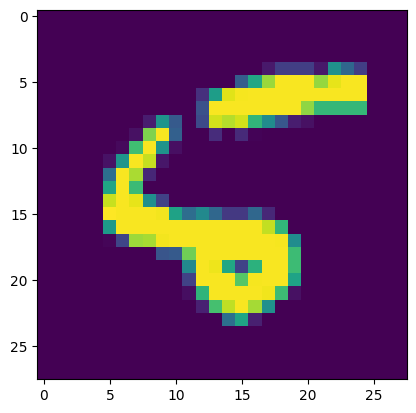

In [ ]:
plt.imshow(test_images[8])

In [ ]:
def conv(input, kernel):
  output = []
  for i in range(input.shape[0]-kernel.shape[0]+1):
    output.append([])
    for j in range(input.shape[0]-kernel.shape[0]+1):
      result = 0
      for ki in range(kernel.shape[0]):
        for kj in range(kernel.shape[1]):
          result += kernel[ki][kj] * input[i+ki][j+kj]

      if(result >= 0):
        output[i].append(result[0][0])
      else:
        output[i].append(0)

  return np.array(output)

In [ ]:
l1 = conv(test_images[3], first_convolution)
l2 = conv(l1, second_convolution)
l3 = conv(l2, third_convolution)
flat = l3.reshape((1, -1))
result = np.matmul(flat, fully_connected)

sum = 0
for i in range(len(result[0])):
  sum += math.exp(result[0][i])

for i in range(len(result[0])):
  result[0][i] = math.exp(result[0][i]) / sum
result = tf.exp(result) / tf.reduce_sum(tf.exp(result), 1, keepdims=True)

In [ ]:
prediction = model.predict(test_images[0:5])

1/1 [==============================] - 0s 220ms/step
